## IMPORT

In [96]:
from nltk.corpus import wordnet as wn
from nltk.corpus import semcor
from collections import Counter
import string
import matplotlib.pyplot as plt
import numpy as np

## FUNZIONE PER IL CALCOLO DEL BASICNESS SCORE

In [97]:
def calculate_basicness_score(synset, max_depth):
    #Calcolo la profondità del synset nella gerarchia di WordNet
    depth = synset.max_depth()
    #rapporto tra profondità albero e profindità del synset
    basicness_score = depth / max_depth 

    return synset, basicness_score



## SALVATAGGIO DI TUTTI I SYNSET DI WORDNET

In [98]:
synsets = list(wn.all_synsets(wn.NOUN)) 

## CALCOLO MAX PROFONDITA' DEL GRAFO DI WORDNET

In [99]:
max_depth = 0
for synset in synsets:
    depth = synset.max_depth()
    if depth > max_depth:
        max_depth = depth

In [100]:
basicness_scores = {}

for synset in synsets:
    syn,score = calculate_basicness_score(synset, max_depth)
    basicness_scores[syn] = score
    
sorted_scores = dict(sorted(basicness_scores.items(), key=lambda item: item[1]))

## RISULTATI

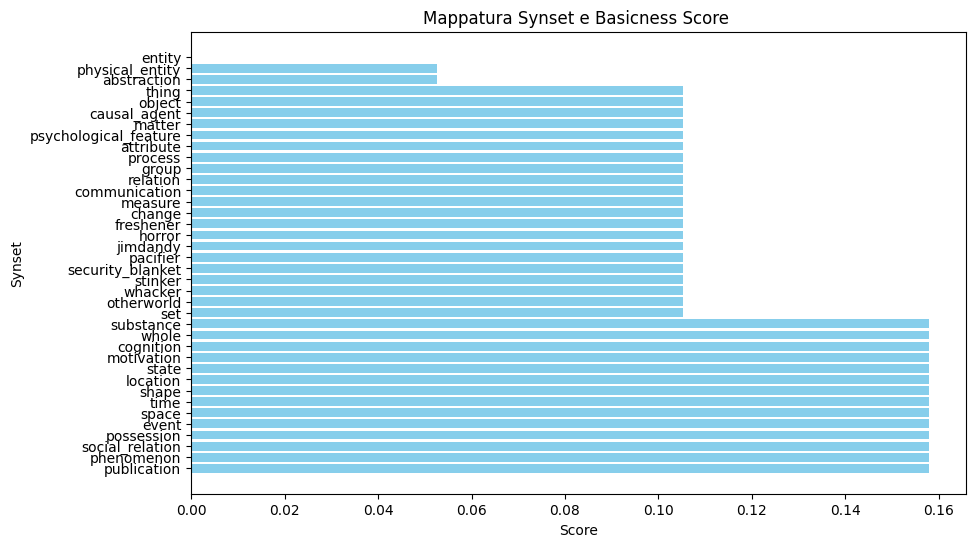

In [101]:

#preparazione dati per grafico
synsets = list(sorted_scores.keys())
values = list(sorted_scores.values())
lemma_synsets=[]
first_value=[]
i=0
lemma_synsets = [s.lemmas()[0].name() for i, s in enumerate(synsets) if i < 40]
first_values = [v for i,v in enumerate(values) if i < 40]

#grafico a barre primi 40 synset mappati
plt.figure(figsize=(10, 6))
plt.barh(lemma_synsets, first_values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Synset')
plt.title('Mappatura Synset e Basicness Score ')
plt.gca().invert_yaxis() 
plt.show()
